In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
import typing
warnings.filterwarnings('ignore')
from pprint import pprint
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from mpl_toolkits.mplot3d import Axes3D
pd.set_option('display.max_columns', 500)

# Datasets

In this section, we will load and explore several datasets where the task is classification; specifically the **digits** and **iris** datasets from Scikit-Learn, as well as the **letters** dataset from OpenML, in order to ensure a variety between continuous and categorical features and targets.

In [ ]:
# Helper function to convert the datasets from Scikit-Learn and OpenML to dataframes
def dataset_to_dataframe(dataset):
  X, y = dataset.data, dataset.target
  try:
    attribute_names = dataset.feature_names
    df = pd.DataFrame(X, columns=attribute_names)
  except:
    df = pd.DataFrame(X)
  df["target"] = y
  return df

## Digits Dataset

First, let's see how this digits dataset looks like. It is composed of 1797 instances; each image is 8 x 8, we convert is to a vector of length 64, each pixel being an integer in the range 0, 16.

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
digits_df = dataset_to_dataframe(dataset=digits)
digits_df.head(1800)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


Now, let's see how some of those digits look like.

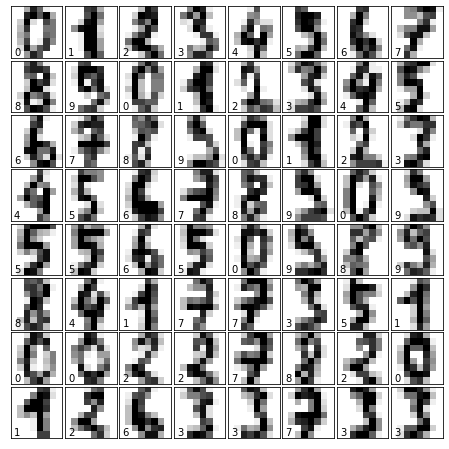

In [ ]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We can plot the value count of each class, to prove that the datasets are balanced.

[]

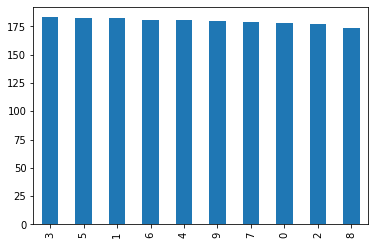

In [ ]:
plt.figure()
digits_df['target'].value_counts().plot.bar()
plt.plot()

To visualize this dataset, let's overlap histograms of the different digits, representing the distribution of the average intensity of their pixels. Unfortuantely, since most overlap in terms of mean and standard deviation, we can't tell by eye which distribution belongs to which number (we believed that a '1' would be less intense relative to an '8' for instance)


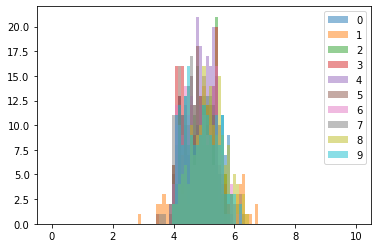

In [ ]:
digits_freq = {i: [] for i in range(10)}
for idx, data_arr in enumerate(digits.data):
    target = digits.target[idx]
    digits_freq[target].append(data_arr.mean())

bins = np.linspace(0, 10, 100)
for digit_target, intensity_means in digits_freq.items():
    plt.hist(intensity_means, bins=bins, alpha=0.5, label=digit_target)

plt.legend(loc='upper right')
plt.show()

However, by applying PCA, we notice the digit classes are separable

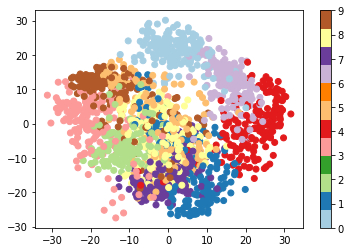

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()
plt.show()

## Iris Dataset

Now, for the Iris dataset, we see it has 3 classes (Setosa, Versicolour, and Virginica) encoded as 0, 1, and 2, as well as 4 features (petal and sepal lengths and widths), for a total of 150 instances

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names
iris_df = dataset_to_dataframe(dataset=iris)
iris_df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


[]

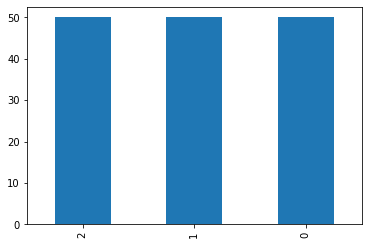

In [ ]:
# We can plot the value count of each class
plt.figure()
iris_df['target'].value_counts().plot.bar()
plt.plot()

Now, we see how Principal Component Analysis is applied to the Iris dataset to get a better understanding of interaction of the dimensions

[]

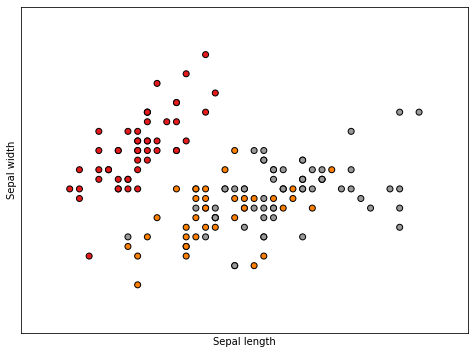

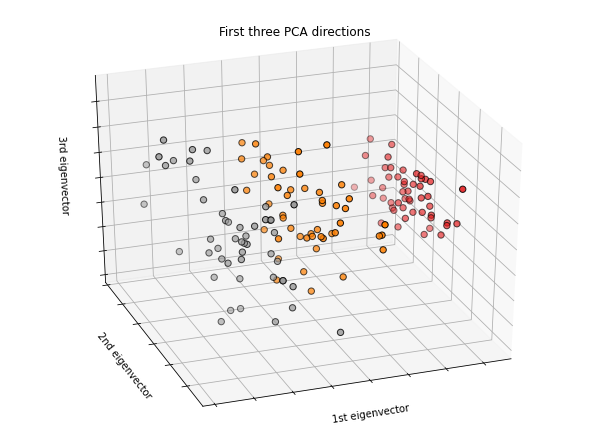

In [ ]:
# Code from https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

## Letters Dataset

In [ ]:
from sklearn.datasets import fetch_openml

letters = fetch_openml('letter')
letters_df = dataset_to_dataframe(dataset=letters)
letters_df.head()
letters_df = shuffle(letters_df, random_state=1234).head(2000)

[]

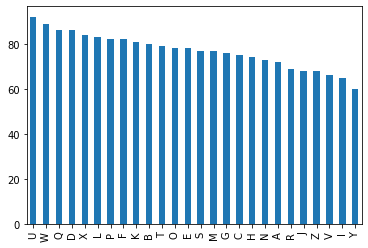

In [ ]:
# We can plot the value count of each letter
plt.figure()
letters_df['target'].value_counts().plot.bar()
plt.plot()

# Softmax Regression

In this section, we will implement from scratch a **model**, `SoftmaxRegression`, which will be *fitted* using an **optimizer**, `GradientDescent`. We define the classes below.


In [ ]:
import string

# The helpers below help us use one-hot encoding for categorical features.
def one_hot_encode_digits(y):
    return (np.arange(np.max(y) + 1) == y[:, None]).astype(float)

def one_hot_encode_letters(y, alphabet=string.ascii_uppercase):
    return np.array([[0.0 if char != letter else 1.0 for char in alphabet] for letter in y], dtype=np.float64)
    

## Gradient Descent

We implement mini-batch optimization using gradient descent with
momentum. An instance of this optimizer is passed to the logistic regression class to fit the data.

In [ ]:
class GradientDescent():
    def __init__(self, epochs: int = 1e4, beta = 0.9, learning_rate: float = 0.001, epsilon=1e-2, batch_size=32):
        self.epochs = epochs
        self.beta = beta
        self.learning_rate = learning_rate  # between 0 and 1
        self.epsilon = epsilon  # termination condition
        self.weight_history = []  # for visualization
        self.validation_accuracy_history = []
        self.validation_error_history = []
        self.train_accuracy_history = []
        self.batch_size = batch_size

    def run(self, X, y, gradient_fn: typing.Callable, one_hot_encode=one_hot_encode_digits, T=None, X_test=None, y_test=None):
        N, D = X.shape
        C = len(y[0])
        w, delta_W, g, t = np.zeros((C, D)), np.zeros((C, D)), np.inf, 1
        last_validation_error = np.inf
        iterations_not_decreasing = 0
        while np.linalg.norm(g) > self.epsilon and t < self.epochs:

            # shuffle dataset
            X, y = shuffle(X, y, random_state=0)

            # create batches
            mini_batches_X = []
            mini_batches_y = []
            for i in range(0, N, self.batch_size):
                mini_batches_X.append(X[i : min(N, i + self.batch_size)])
                mini_batches_y.append(y[i : min(N, i + self.batch_size)])

            # calculate batch gradients
            for i in range(len(mini_batches_X)):
                g = gradient_fn(mini_batches_X[i], mini_batches_y[i], w)
                delta_W = self.beta * delta_W + (1 - self.beta) * g
                w = w - self.learning_rate * delta_W

            # Update weight history
            self.weight_history.append(w)

            # Termination condition test
            if T is not None:

                # Make prediction on test set
                y_predicted = np.argmax((X_test @ w.T), axis=1)
                y_train_predicted = np.argmax((X @ w.T), axis=1)

                # Define cost function - cross-entropy
                def cost(w, X_test, y_test):
                    y_test = one_hot_encode(y_test)
                    z = np.dot(X_test, w)
                    J = np.mean(y_test * np.log1p(np.exp(-z)) + (1 - y_test) * np.log1p(np.exp(z)))
                    return J

                # Calculate validation error
                num_correct = 0
                for i in range(len(y_predicted)):
                    if y_test[i] == y_predicted[i]:
                        num_correct += 1
                # validation_error = len(y_predicted) - num_correct
                validation_error = cost(w.T, X_test, y_test)
                self.validation_accuracy_history.append(num_correct / len(y_predicted))
                self.validation_error_history.append(validation_error)
                
                # Calculate train error
                train_error = 0
                for i in range(len(y_train_predicted)):
                    if y[i][y_train_predicted[i]] == 1.:
                        train_error += 1
                self.train_accuracy_history.append(train_error / len(y_train_predicted))

                # Check if validation error stops decreasing
                if validation_error >= last_validation_error:
                    iterations_not_decreasing += 1
                else:
                    iterations_not_decreasing = 0

                if iterations_not_decreasing >= T:
                    i_max = np.argmax(self.validation_accuracy_history)
                    return self.weight_history[i_max]

                last_validation_error = validation_error

            t += 1
        return w

In [ ]:
class SoftmaxRegression():
    def __init__(self, gradient_descent: GradientDescent, add_bias: bool = True):
        self.add_bias = add_bias
        self.gradient_descent = gradient_descent
        self.W = None

    def fit(self, X, y, one_hot_encode=one_hot_encode_digits, X_test=None, y_test=None, T=None):
        y = one_hot_encode(y)
        N, D = X.shape  # N is entries (rows), D is features (columns)
        if self.add_bias:
            bias = np.ones(shape=N)  # we initialize a bias vector
            # column_stack: Take a sequence of 1-D arrays and stack them as columns to make a single 2-D array
            X = np.column_stack([X, bias])
            if X_test is not None:
              X_test = np.column_stack([X_test, np.ones(X_test.shape[0])])
        
        def softmax(z):
            e_z = np.exp(z.T - np.max(z.T))
            return (e_z / e_z.sum(axis=0)).T
            
        def gradient(X, y, W):
            return (softmax(X @ W.T) - y).T @ X

        self.W = self.gradient_descent.run(X=X, y=y, gradient_fn=gradient, one_hot_encode=one_hot_encode,
                                           X_test=X_test, y_test=y_test, T=T)

    def predict(self, X):
        if self.add_bias:
            X = np.column_stack([X, np.ones(X.shape[0])])

        return np.argmax((X @ self.W.T), axis=1)

Now, we adjust these methods to also receive a validation set, to track the training and validation accuracy in each step of the optimization

In [ ]:
def test_model(softmax_regression, X_test, y_test, cmp=lambda y_test, y_predicted: y_test==y_predicted):
    y_predicted = softmax_regression.predict(X_test)

    num_correct = 0
    for i in range(len(y_predicted)):
        if cmp(y_test[i], y_predicted[i]):
            num_correct += 1

    accuracy =  num_correct/len(y_predicted)
    return accuracy

def train_model(X_train, y_train, epochs: int = 1e4, beta = 0.9, learning_rate: float = 0.001, epsilon=1e-2, batch_size=32, add_bias: bool = True, one_hot_encode=one_hot_encode_digits, cmp=lambda a,b: a==b):
    gradient_descent = GradientDescent(epochs, beta, learning_rate, epsilon, batch_size)
    softmax_regression = SoftmaxRegression(gradient_descent, add_bias)
    softmax_regression.fit(X_train, y_train, one_hot_encode=one_hot_encode)
    training_accuracy = test_model(softmax_regression, X_train, y_train, cmp=cmp)
    return softmax_regression, training_accuracy


# Required Analysis

## Hyper-Parameters of the Optimization Procedure

First, we implement the 5 fold cross-validation procedure from scratch

In [ ]:
# Adapted from https://machinelearningmastery.com/implement-resampling-methods-scratch-python/

from random import seed
from random import randrange
from pprint import pprint

# Split a dataset into k folds
def cross_validation_split(dataset, folds=5):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        train, test = [], []
        while len(test) < fold_size:
            index = randrange(len(dataset_copy))
            test.append(list(dataset_copy.pop(index)))
        train = [x for x in dataset if list(x) not in test]
        dataset_split.append((np.array(train), test))
    return dataset_split

def cross_validate(dataset, one_hot_encode=one_hot_encode_digits, cmp=lambda a,b: a==b, batch_size=32, learning_rate=0.01, beta=0.9):
    folds = cross_validation_split(dataset)
    valid_acc, train_acc = 0, 0
    for (train, test) in folds:
        train_df, test_df = pd.DataFrame(train), pd.DataFrame(test)
        X_train, Y_train = train_df.iloc[:, :-1].astype('float64'), train_df.iloc[:, -1]
        X_test, Y_test = test_df.iloc[:, :-1].astype('float64'), test_df.iloc[:, -1]

        softmax_regression, train_accuracy = train_model(X_train, Y_train, one_hot_encode=one_hot_encode, batch_size=batch_size, learning_rate=learning_rate, beta=beta, cmp=cmp)
        accuracy = test_model(softmax_regression, X_test, Y_test, cmp=cmp)
        valid_acc += accuracy
        train_acc += train_accuracy

    return valid_acc/len(folds), train_acc/len(folds), 

# Let us test on digits dataset (the output gives accuracy)
print(cross_validate(dataset=digits_df.values))
print(cross_validate(dataset=letters_df.values, one_hot_encode=one_hot_encode_letters, cmp=lambda a, b: string.ascii_uppercase.index(a) == b))

(0.9448467966573816, 0.9614742698191933)
(0.6224999999999999, 0.6729491512997511)


Now, we use grid search to find a good combination of hyperparameters for `batch_size`, `learning_rate`, and `momentum_parameter`

In [ ]:
import time
from typing import Tuple
pd.set_option("display.max_rows", 100)

def optimize_hyperparameters(data, batch_sizes: Tuple[int, int, int], 
                             learning_rates: Tuple[int, int, int], 
                             momentum_parameters: Tuple[int, int, int],
                             one_hot_encode=one_hot_encode_digits,
                             cmp=lambda a,b: a==b):

  merged_dict = {}
    
  for batch_size in np.arange(batch_sizes[0], batch_sizes[1], batch_sizes[2]):
    for learning_rate in np.arange(learning_rates[0], learning_rates[1], learning_rates[2]):
      for momentum_parameter in np.arange(momentum_parameters[0], momentum_parameters[1], momentum_parameters[2]):

        start_time = time.time()
        validation_accuracy, training_accuracy = cross_validate(data, one_hot_encode=one_hot_encode, cmp=cmp, batch_size=batch_size, learning_rate=learning_rate, beta=momentum_parameter)
        end_time = time.time()

        # print(batch_size, learning_rate, momentum_parameter, validation_accuracy, training_accuracy, end_time - start_time, sep='\t')

        merged_dict[(batch_size, learning_rate, momentum_parameter)] = {'Validation Accuracy': validation_accuracy,
                                                                          'Training Accuracy': training_accuracy,
                                                                          'Time Elapsed': end_time - start_time}

  df = pd.DataFrame.from_dict(merged_dict, orient='index')
  df = df.reset_index()
  df = df.rename(columns={'level_0': 'Batch Size', 'level_1': 'Learning Rate', 'level_2': 'Momentum Parameter'})

  return df

Let's test it on our datasets, then find the optimal hyperparameters, and finally plot one of these training and validation curves for several representative choices of hyper-parameters.

In [ ]:
def hyperparameter_var_plotting(df, opt_params):
    fig, ax =  plt.subplots(2, 3, figsize=(20,9))

    temp = df[df['Batch Size'] == opt_params['Batch Size']]
    temp = temp[temp['Learning Rate'] == opt_params['Learning Rate']]
    ax[0][0].plot(temp['Momentum Parameter'], temp['Validation Accuracy'], label='Validation Accuracy')
    ax[0][0].plot(temp['Momentum Parameter'], temp['Training Accuracy'], label='Training Accuracy')
    ax[0][0].legend()
    ax[0][0].set_title('fixed batch size and learning rate, varying momentum')

    ax[1][0].plot(temp['Momentum Parameter'], temp['Time Elapsed'], label='Time Elapsed')
    ax[1][0].legend()
    ax[1][0].set_title('time elapsed for varying momentum parameter')

    temp = df[df['Batch Size'] == opt_params['Batch Size']]
    temp = temp[temp['Momentum Parameter'] == opt_params['Momentum Parameter']]
    ax[0][1].plot(temp['Learning Rate'], temp['Validation Accuracy'], label='Validation Accuracy')
    ax[0][1].plot(temp['Learning Rate'], temp['Training Accuracy'], label='Training Accuracy')
    ax[0][1].legend()
    ax[0][1].set_title('fixed batch size and momentum, varying learning rate')

    ax[1][1].plot(temp['Learning Rate'], temp['Time Elapsed'], label='Time Elapsed')
    ax[1][1].legend()
    ax[1][1].set_title('time elapsed for varying learning rate')

    temp = df[df['Momentum Parameter'] == opt_params['Momentum Parameter']]
    temp = temp[temp['Learning Rate'] == opt_params['Learning Rate']]
    ax[0][2].plot(temp['Batch Size'], temp['Validation Accuracy'], label='Validation Accuracy')
    ax[0][2].plot(temp['Batch Size'], temp['Training Accuracy'], label='Training Accuracy')
    ax[0][2].legend()
    ax[0][2].set_title('fixed momentum and learning rate, varying batch size')

    ax[1][2].plot(temp['Batch Size'], temp['Time Elapsed'], label='Time Elapsed')
    ax[1][2].legend()
    ax[1][2].set_title('time elapsed for varying batch size')

In [ ]:
# For Digits
digits_cross_df = optimize_hyperparameters(digits_df.values, batch_sizes=(16, 56, 16), learning_rates=(0.01, 0.03, 0.005), momentum_parameters=(0.6, 0.9, 0.1))
digits_cross_df.head(100)

,Batch Size,Learning Rate,Momentum Parameter,Validation Accuracy,Training Accuracy,Time Elapsed
0,16,0.010,0.6,0.923677,0.944645,0.748734
1,16,0.010,0.7,0.916992,0.933936,0.709346
2,16,0.010,0.8,0.938719,0.955911,0.740856
3,16,0.010,0.9,0.923677,0.942420,0.787859
4,16,0.015,0.6,0.930362,0.943672,0.708203
5,16,0.015,0.7,0.910306,0.927955,0.625994
6,16,0.015,0.8,0.911421,0.930459,0.697515
7,16,0.015,0.9,0.931476,0.952990,0.633262
8,16,0.020,0.6,0.912535,0.932684,0.716445
9,16,0.020,0.7,0.919777,0.940195,0.627205


Optimal Hyperparameters for Digits dataset cross-validation:
Batch Size            48.000
Learning Rate          0.015
Momentum Parameter     0.600
Name: 36, dtype: float64


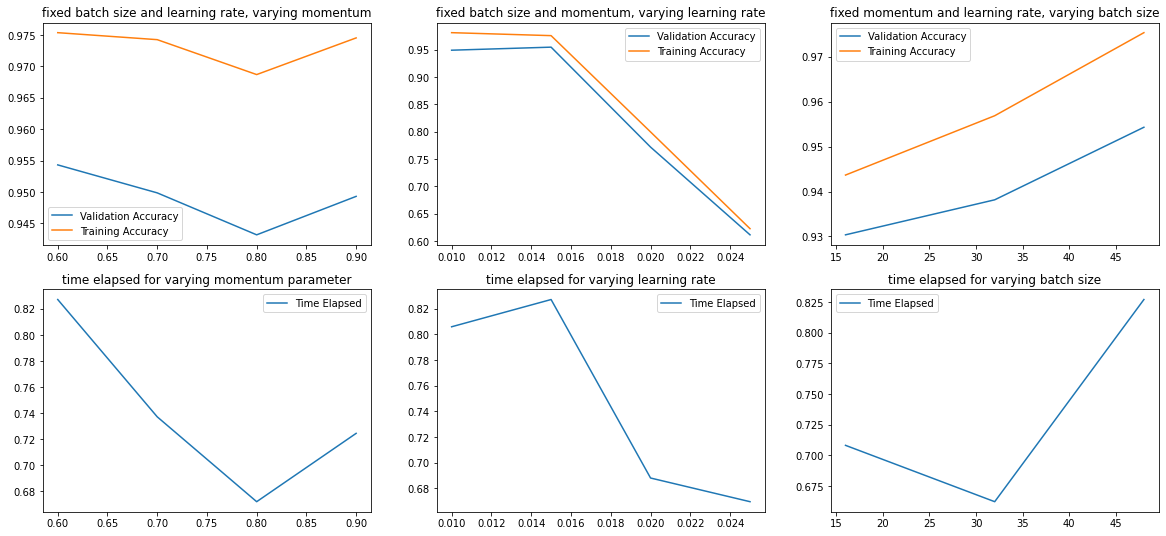

In [ ]:
i = digits_cross_df['Validation Accuracy'].idxmax()
digits_opt = digits_cross_df.iloc[i, 0:3]
print('Optimal Hyperparameters for Digits dataset cross-validation:')
print(digits_opt)
hyperparameter_var_plotting(df=digits_cross_df, opt_params=digits_opt)

In [ ]:
# For Iris
iris_cross_df = optimize_hyperparameters(iris_df.values, batch_sizes=(32, 56, 16), learning_rates=(0.01, 0.03, 0.01), momentum_parameters=(0.6, 0.9, 0.1))
iris_cross_df.head(100)

,Batch Size,Learning Rate,Momentum Parameter,Validation Accuracy,Training Accuracy,Time Elapsed
0,32,0.01,0.6,0.966667,0.984944,24.842188
1,32,0.01,0.7,0.973333,0.983249,26.738151
2,32,0.01,0.8,0.980000,0.984944,23.714697
3,32,0.01,0.9,0.966667,0.988305,22.495749
4,32,0.02,0.6,0.973333,0.976611,11.122998
5,32,0.02,0.7,0.973333,0.984916,17.680331
6,32,0.02,0.8,0.980000,0.983291,18.428286
7,32,0.02,0.9,0.980000,0.983333,21.057535
8,48,0.01,0.6,0.966667,0.986625,21.901620
9,48,0.01,0.7,0.973333,0.983291,23.399623


Optimal Hyperparameters for Iris dataset cross-validation:
Batch Size            32.00
Learning Rate          0.01
Momentum Parameter     0.80
Name: 2, dtype: float64


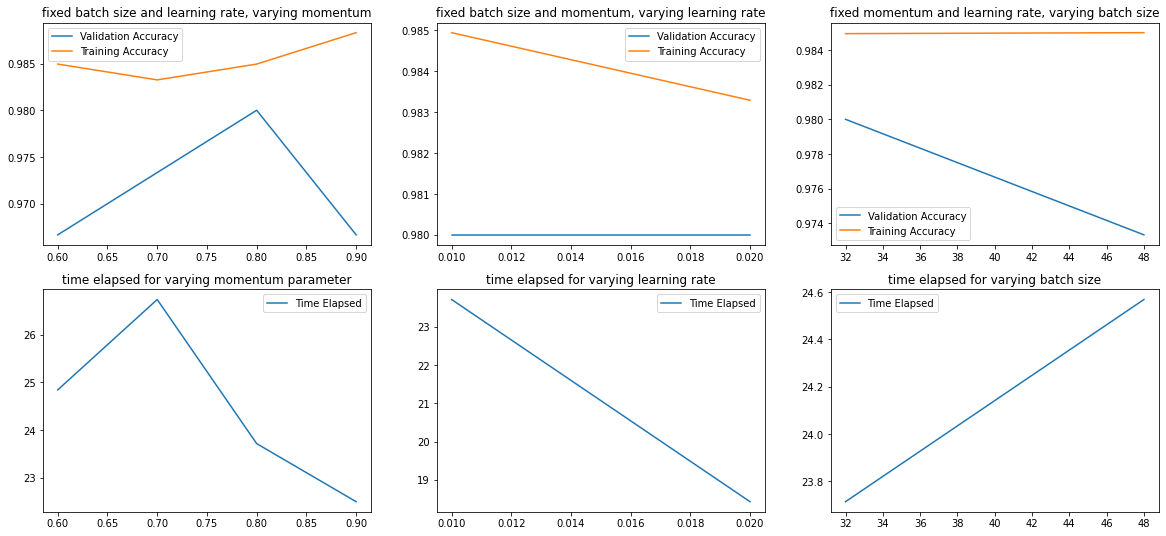

In [ ]:
i = iris_cross_df['Validation Accuracy'].idxmax()
iris_opt = iris_cross_df.iloc[i, 0:3]
print('Optimal Hyperparameters for Iris dataset cross-validation:')
print(iris_opt)
hyperparameter_var_plotting(df=iris_cross_df, opt_params=iris_opt)

In [ ]:
# For Letters
letters_cross_df = optimize_hyperparameters(letters_df.values, batch_sizes=(32, 56, 16), learning_rates=(0.01, 0.03, 0.01), momentum_parameters=(0.6, 0.9, 0.1),
                              one_hot_encode=one_hot_encode_letters, cmp=lambda a, b: string.ascii_uppercase.index(a) == b)
letters_cross_df.head(100)

32	0.01	0.6	0.6244999999999999	0.6945918704651943	207.75183963775635
32	0.01	0.7	0.6325	0.6813808624631961	203.03802609443665
32	0.01	0.7999999999999999	0.6255	0.6668189324710584	202.05965566635132
32	0.01	0.8999999999999999	0.6275000000000001	0.6716029675682293	205.30175828933716
32	0.02	0.6	0.615	0.6577015289504449	165.92619013786316
32	0.02	0.7	0.626	0.665061822212848	201.04949235916138
32	0.02	0.7999999999999999	0.6385	0.6732629192412125	201.14018154144287
32	0.02	0.8999999999999999	0.6415000000000001	0.6948241505775882	201.28663730621338
48	0.01	0.6	0.569	0.5970379639908402	30.424066305160522
48	0.01	0.7	0.5905	0.64180362650442	110.33995532989502
48	0.01	0.7999999999999999	0.587	0.6366355078191088	106.92054986953735
48	0.01	0.8999999999999999	0.6300000000000001	0.6852548107818213	135.63369464874268
48	0.02	0.6	0.5435000000000001	0.5914034903133155	4.16610860824585
48	0.02	0.7	0.5039999999999999	0.5445393987756644	40.89029121398926
48	0.02	0.7999999999999999	0.5715	0.61271825305985

,Batch Size,Learning Rate,Momentum Parameter,Validation Accuracy,Training Accuracy,Time Elapsed
0,32,0.01,0.6,0.6245,0.694592,207.751840
1,32,0.01,0.7,0.6325,0.681381,203.038026
2,32,0.01,0.8,0.6255,0.666819,202.059656
3,32,0.01,0.9,0.6275,0.671603,205.301758
4,32,0.02,0.6,0.6150,0.657702,165.926190
5,32,0.02,0.7,0.6260,0.665062,201.049492
6,32,0.02,0.8,0.6385,0.673263,201.140182
7,32,0.02,0.9,0.6415,0.694824,201.286637
8,48,0.01,0.6,0.5690,0.597038,30.424066
9,48,0.01,0.7,0.5905,0.641804,110.339955


Optimal Hyperparameters for Letters dataset cross-validation:
Batch Size            32.00
Learning Rate          0.02
Momentum Parameter     0.90
Name: 7, dtype: float64


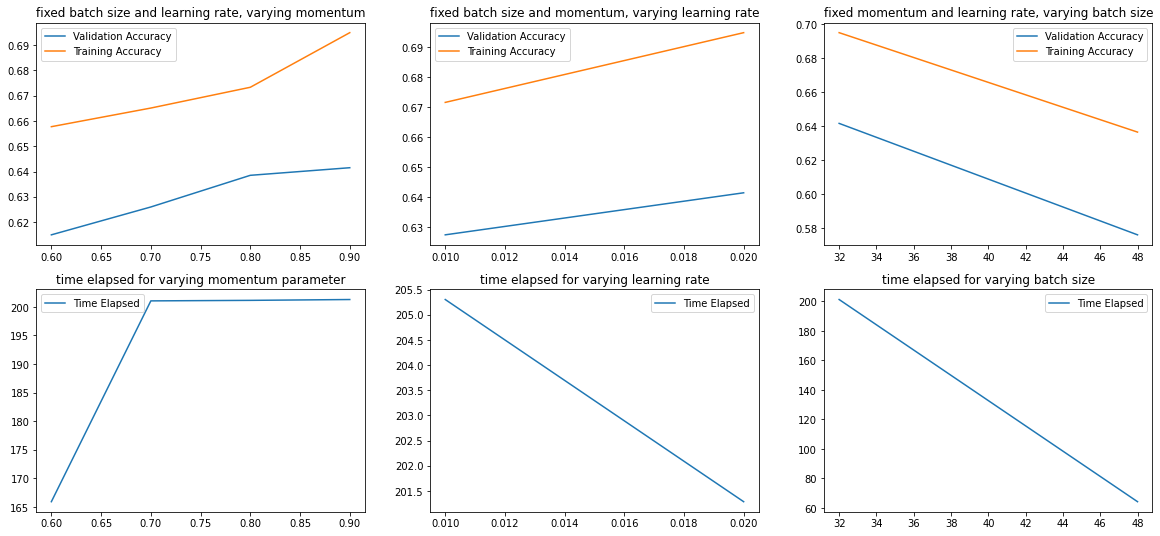

In [ ]:
i = letters_cross_df['Validation Accuracy'].idxmax()
letters_opt = letters_cross_df.iloc[i, 0:3]
print('Optimal Hyperparameters for Letters dataset cross-validation:')
print(letters_opt)
hyperparameter_var_plotting(df=letters_cross_df, opt_params=letters_opt)

In [ ]:
# Closer look for digits batch size
digits_cross_df_batch_size = optimize_hyperparameters(digits_df.values, batch_sizes=(4, 100, 4), learning_rates=(0.015, 0.016, 0.01), momentum_parameters=(0.8, 0.81, 0.1))
digits_cross_df_batch_size.head(100)

,Batch Size,Learning Rate,Momentum Parameter,Validation Accuracy,Training Accuracy,Time Elapsed
0,4,0.015,0.8,0.894150,0.901530,0.686379
1,8,0.015,0.8,0.911978,0.929903,0.641742
2,12,0.015,0.8,0.922563,0.938248,0.720493
3,16,0.015,0.8,0.927019,0.948957,0.778049
4,20,0.015,0.8,0.918663,0.949791,0.751107
5,24,0.015,0.8,0.920891,0.945619,0.711331
6,28,0.015,0.8,0.918663,0.940890,0.647879
7,32,0.015,0.8,0.935933,0.960779,0.708645
8,36,0.015,0.8,0.947632,0.974548,0.792341
9,40,0.015,0.8,0.934819,0.961752,0.801712


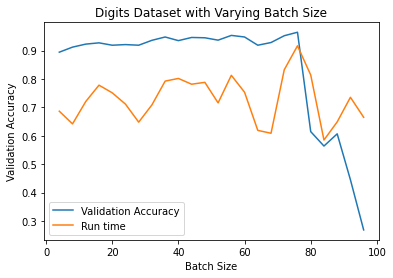

In [ ]:
plt.plot(digits_cross_df_batch_size['Batch Size'], digits_cross_df_batch_size['Validation Accuracy'], label='Validation Accuracy')
plt.plot(digits_cross_df_batch_size['Batch Size'], digits_cross_df_batch_size['Time Elapsed'], label='Run time')
plt.legend()
plt.xlabel('Batch Size')
plt.ylabel('Validation Accuracy')
plt.title('Digits Dataset with Varying Batch Size')
plt.show()

In [ ]:
# Closer look for digits learning rates
digits_cross_df_learning_rate = optimize_hyperparameters(digits_df.values, batch_sizes=(48, 49, 8), learning_rates=(0.01, 0.030, 0.002), momentum_parameters=(0.8, 0.81, 0.1))
digits_cross_df_learning_rate.head(100)

,Batch Size,Learning Rate,Momentum Parameter,Validation Accuracy,Training Accuracy,Time Elapsed
0,48,0.010,0.8,0.956546,0.983310,0.884180
1,48,0.012,0.8,0.935376,0.960779,0.775140
2,48,0.014,0.8,0.949861,0.979972,0.836958
3,48,0.016,0.8,0.940947,0.967594,0.839189
4,48,0.018,0.8,0.935376,0.961613,0.720024
5,48,0.020,0.8,0.779944,0.794576,0.755300
6,48,0.022,0.8,0.601114,0.620167,0.649100
7,48,0.024,0.8,0.442340,0.452851,0.697644
8,48,0.026,0.8,0.600000,0.601391,0.627630
9,48,0.028,0.8,0.099164,0.099026,0.559100


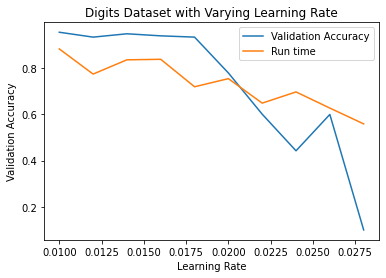

In [ ]:
plt.plot(digits_cross_df_learning_rate['Learning Rate'], digits_cross_df_learning_rate['Validation Accuracy'], label='Validation Accuracy')
plt.plot(digits_cross_df_learning_rate['Learning Rate'], digits_cross_df_learning_rate['Time Elapsed'], label='Run time')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.title('Digits Dataset with Varying Learning Rate')
plt.show()

In [ ]:
# Closer look for digits momentum rates
digits_cross_df_momentum_rate = optimize_hyperparameters(digits_df.values, batch_sizes=(48, 49, 8), learning_rates=(0.01, 0.011, 0.03), momentum_parameters=(0.5, 0.95, 0.02))
digits_cross_df_momentum_rate.head(100)

,Batch Size,Learning Rate,Momentum Parameter,Validation Accuracy,Training Accuracy,Time Elapsed
0,48,0.01,0.50,0.926462,0.954242,0.971420
1,48,0.01,0.52,0.933148,0.958832,0.760370
2,48,0.01,0.54,0.946518,0.966620,0.792150
3,48,0.01,0.56,0.943733,0.972045,0.799109
4,48,0.01,0.58,0.951532,0.976217,0.851003
5,48,0.01,0.60,0.952646,0.982893,0.912349
6,48,0.01,0.62,0.943733,0.967455,0.739165
7,48,0.01,0.64,0.945404,0.975800,0.851969
8,48,0.01,0.66,0.942618,0.973157,0.882892
9,48,0.01,0.68,0.953203,0.977608,0.800043


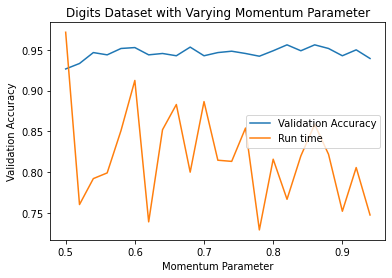

In [ ]:
plt.plot(digits_cross_df_momentum_rate['Momentum Parameter'], digits_cross_df_momentum_rate['Validation Accuracy'], label='Validation Accuracy')
plt.plot(digits_cross_df_momentum_rate['Momentum Parameter'], digits_cross_df_momentum_rate['Time Elapsed'], label='Run time')
plt.legend()
plt.xlabel('Momentum Parameter')
plt.ylabel('Validation Accuracy')
plt.title('Digits Dataset with Varying Momentum Parameter')
plt.show()

## Termination Condition

For a given training and validation set, we track the training and validation accuracy in each iteration. We end the optimization if the validation error has not been decreasing in the past T iterations (here T = 25), returning the model with the best validation accuracy, not the model at the last step of gradient descent.

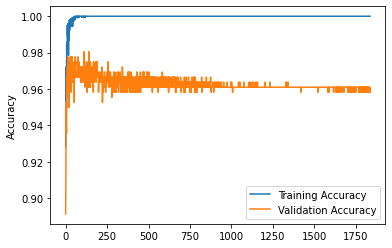

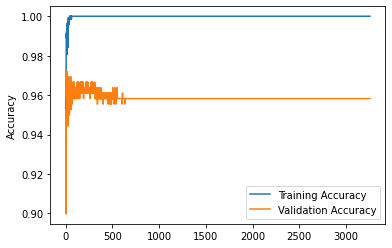

In [ ]:
def run_termination_condition(T):
    dataset = digits_df.values
    folds = cross_validation_split(dataset)
    train_df, test_df = pd.DataFrame(folds[0][0]), pd.DataFrame(folds[0][1])
    digits_X_train, digits_Y_train = train_df.iloc[:, :-1].astype('float64'), train_df.iloc[:, -1]
    digits_X_test, digits_Y_test = test_df.iloc[:, :-1].astype('float64'), test_df.iloc[:, -1]
    gradient_descent = GradientDescent()
    softmax_regression = SoftmaxRegression(gradient_descent)
    softmax_regression.fit(digits_X_train, digits_Y_train, X_test=digits_X_test, y_test=digits_Y_test, T=T)
    plt.plot(softmax_regression.gradient_descent.train_accuracy_history, label='Training Accuracy')
    plt.plot(softmax_regression.gradient_descent.validation_accuracy_history, label='Validation Accuracy')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.show()

run_termination_condition(10)
run_termination_condition(1000)

## Comparison Against Another Classifier

Let's compare our model against its off-the-shelf implementation in Scikit-Learn, `LogisticRegression`, as well as another classifier, `KNN`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

def cmp_sklearn(dataset, one_hot_encode=one_hot_encode_digits, cmp=lambda a, b: a == b):
    folds = cross_validation_split(dataset)
    sklearn_valid_acc, our_valid_acc, knn_acc = 0, 0, 0
    for (train, test) in folds:
        train_df, test_df = pd.DataFrame(train), pd.DataFrame(test)
        X_train, Y_train = train_df.iloc[:, :-1].astype('float64'), train_df.iloc[:, -1]
        X_test, Y_test = test_df.iloc[:, :-1].astype('float64'), test_df.iloc[:, -1]

        softmax_regression, train_accuracy = train_model(X_train, Y_train, one_hot_encode=one_hot_encode)
        our_accuracy = test_model(softmax_regression, X_test, Y_test, cmp=cmp)
        our_valid_acc += our_accuracy

        sklearn_classifier = LogisticRegression(random_state=0).fit(X_train, Y_train)
        sklearn_accuracy = test_model(sklearn_classifier, X_test, Y_test)
        sklearn_valid_acc += sklearn_accuracy

        knn_classifier = KNeighborsClassifier(n_neighbors=10)
        knn_classifier.fit(X_train, Y_train)
        knn_acc += knn_classifier.score(X_test, Y_test)

    our_valid_acc = our_valid_acc/len(folds)
    sklearn_valid_acc = sklearn_valid_acc/len(folds)
    knn_acc = knn_acc/len(folds)

    return our_valid_acc, sklearn_valid_acc, knn_acc

In [ ]:
our_valid_acc, sklearn_valid_acc, knn_acc = cmp_sklearn(digits_df.values)

print('Digits Dataset:')
print('Our accuracy:', our_valid_acc)
print('sklearn accuracy:', sklearn_valid_acc)
print('knn accuracy:', knn_acc)

Digits Dataset:
Our accuracy: 0.9665738161559888
sklearn accuracy: 0.9660167130919219
knn accuracy: 0.9810584958217271


In [ ]:
our_valid_acc, sklearn_valid_acc, knn_acc = cmp_sklearn(letters_df.values, one_hot_encode=one_hot_encode_letters, cmp=lambda a, b: string.ascii_uppercase.index(a) == b)

print('Letters Dataset:')
print('Our accuracy:', our_valid_acc)
print('sklearn accuracy:', sklearn_valid_acc)
print('knn accuracy:', knn_acc)

Letters Dataset:
Our accuracy: 0.7085
sklearn accuracy: 0.7265
knn accuracy: 0.6905


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(letters.data, letters.target, test_size=0.8, shuffle=True)

softmax_regression, train_accuracy = train_model(X_train, y_train, one_hot_encode=one_hot_encode_letters)
accuracy = test_model(softmax_regression, X_test, y_test, cmp=lambda a, b: string.ascii_uppercase.index(a) == b)

print(accuracy)

0.732125
